<a href="https://colab.research.google.com/github/waveology/kitchen/blob/main/03_introduccion_xarray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<html><img src="https://owncloud.aemet.es/index.php/s/lwiFbCGBRAJHlF7/download?path=%2F&files=logo.png"></html>


* **Autor:** Ernesto Barrera
* **Institución:** AEMET
---

#Introducción a xarray

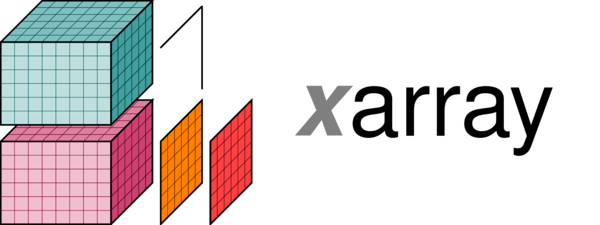

* [Web del proyecto](https://github.com/pydata/xarray)
* [Referencia de la API](https://docs.xarray.dev/en/stable/index.html)
* [Galería](https://docs.xarray.dev/en/stable/gallery.html)

* **¿Qué es xarray?** Una extensión de Python para el tratamiento de datos multidimensionales con etiquetas.

* **¿Cómo se usa xarray?** Importando el módulo en Python.

* **¿Cuándo usar xarray?** Cuando se requiera el tratamiento de datos multidimensionales forma sencilla y eficiente

* **¿Por qué xarray?** Porque se comporta como una versión multimensional de Pandas, se construye sobre Numpy y tiene su propia interfaz a Cartopy

##Descarga de ficheros de datos

In [ ]:
# Datos de temperatura a 2 metros - ERA5 - [1987-2020]  -  res=0.25º
# -------------------------------------------------------------------
ifile = 'era5_t2m_1987_2020_europa_025.rar'
!wget -q --no-check-certificate https://owncloud.aemet.es/index.php/s/Ns1t4FXmZoi5hK4/download -O {ifile} && unrar -o+ e {ifile} && rm -f {ifile}

# Datos de temperatura en niveles verticales - ERA5 - [2020]  -  res=0.25º
# -----------------------------------------------------------------------
ifile = 'era5_pl_t_2020_global_025.rar'
!wget -q --no-check-certificate https://owncloud.aemet.es/index.php/s/NoAwwclSdzI1A1g/download -O {ifile} && unrar -o+ e {ifile} && rm -f {ifile}

# Máscara tierra-suelo - ERA5 - [1987-2020]  -  res=0.25º
# ----------------------------------------------------------
ifile = 'era5_t2m_1987_2020_europa_025_lsm.rar'
!wget -q --no-check-certificate https://owncloud.aemet.es/index.php/s/leirUBqlMnLxIAL/download -O {ifile} && unrar -o+ e {ifile} && rm -f {ifile}

# Datos del año 2017
# -------------------
ifile = 'era5_t2m_europa_05_2017.rar'
!wget -q --no-check-certificate https://owncloud.aemet.es/index.php/s/Vhr5GyRlTt3fSgg/download -O {ifile} && unrar -o+ e {ifile} && rm -f {ifile}

# Datos del año 2018
# -------------------
ifile = 'era5_t2m_europa_05_2018.rar'
!wget -q --no-check-certificate https://owncloud.aemet.es/index.php/s/HJ0IteRty8Mh29Y/download -O {ifile} && unrar -o+ e {ifile} && rm -f {ifile}

# Datos del año 2019
# -------------------
ifile = 'era5_t2m_europa_05_2019.rar'
!wget -q --no-check-certificate https://owncloud.aemet.es/index.php/s/HFUtgstnA4Cqg75/download -O {ifile} && unrar -o+ e {ifile} && rm -f {ifile}

# Datos de viento a 10m y temperatura a 2m - ERA5 - 2020 - res=0.25ºC
# --------------------------------------------------------------------
ifile = 'era5_t2m_w10_2020_europa_025.rar'
!wget -q --no-check-certificate https://owncloud.aemet.es/index.php/s/7tJ8c3UpRK9sqVE/download -O {ifile} && unrar -o+ e {ifile} && rm -f {ifile}




##Carga de extensiones xarray y Matplotlib

In [ ]:
# Tratamiento de datos multidimensionales
# ------------------------------------------------
import xarray as xr

# Librería gráfica
# -------------------------------
import matplotlib.pyplot as plt

##Lectura de datos
---

En xarray podemos abrir ficheros con la función [open_dataset](https://docs.xarray.dev/en/stable/generated/xarray.open_dataset.html). El argumento puede ser un fichero local o bien la URL de un servidor remoto OpenDAP. Aquí trabajaremos con un fichero local que contiene 33 años de reanálisis de datos de temperaturas superficial en Europa.

In [ ]:
ds = xr.open_dataset('/content/era5_t2m_1987_2020_europa_025.nc')

In [ ]:
# Esto es un tipo de dato Dataset
# --------------------------------
ds

In [ ]:
# Variables del Dataset
# ----------------------
ds.data_vars

In [ ]:
# Dimensiones del Dataset
# ------------------------
ds.dims

In [ ]:
# Coordenadas del Dataset
# -----------------------
ds.coords

Las variables del Dataset son datos de tipo DataArray y se puede acceder ellos de la misma forma que se accede a las columnas en Pandas

In [ ]:
# Acceso mediante el nombre entre paréntesis
# -------------------------------------------
ds['t2m']

In [ ]:
# Acceso concatenando el nombre con un punto
# -------------------------------------------
ds.t2m

##Selección: *isel, sel y slice*
---

xarray se asienta en Numpy y por eso los DataArray comparten métodos y su trato resulta familiar.

In [ ]:
# Extracción del DataArray de temperaturas del Dataset
# Los datos están en K y los pasamos a ºC
# ------------------------------------------------------
t2m = ds.t2m - 273.15

In [ ]:
# Podemos usar shape para inspeccionar las dimensiones
# ---------------------------------------------------
t2m.shape

En Numpy seleccionaríamos elementos del array de esta manera:

In [ ]:
# Selección al estilo Numpy, indicando valores o rangos de los índices
# ---------------------------------------------------------------------
t2m[0, 10:15, 15:25]

En xarray disponemos de dos operadores muy cómodos:

*   ***isel*** : selecciona por índices
*   ***sel***  : selecciona por valores

Veamos unos ejemplos seleccionando tiempos (más info [aquí](https://docs.xarray.dev/en/stable/user-guide/time-series.html)):

In [ ]:
# Selección de los datos correspondientes al primer valor de tiempo
# -----------------------------------------------------------------
t2m.isel(time=0)

In [ ]:
# Selección de los datos correspondientes a un valor específico del tiempo
# ------------------------------------------------------------------------
t2m.sel(time='1987-02-20T12:00:00')

In [ ]:
# ¿Y si el valor específico del tiempo no está presente en los datos?
# Usamos 'method' para especificar que use el tiempo más próximo.
# Más métodos: None, "nearest", "pad", "ffill", "backfill", "bfill"
# -------------------------------------------------------------------------------
#
# Esto dará error porque ese tiempo no está en los datos
# -------------------------------------------------------
# t2m.sel(time='1987-02-18T12:00:00')

# El valor más próximo
# ----------------------------------------------------
t2m.sel(time='1987-02-18T12:00:00',method='nearest')

Para especificar un rango en lugar de un valor concreto usamos la función ***slice***:

In [ ]:
# Selección de los datos correspondientes a un periodo de tiempo
# ---------------------------------------------------------------
t2m.sel(time=slice('1987-02-20T12:00:00', '1987-04-16T12:00:00'))

In [ ]:
# Selección de los datos correspondientes a un periodo de tiempo
# especificando solo mes y año
# ---------------------------------------------------------------
t2m.sel(time=slice('1993-07', '1994-02'))

Las funciones ***sel***, ***isel*** y ***slice*** funcionan exactamente igual con el resto de coordenadas. Algunos ejemplos con la latitud y la longitud:

In [ ]:
# Selección de una ventana geográfica:
# norte = 40º sur = 30º / oeste = -30º / este = 0º
# Nota: en ERA5 las latitudes se almanenan invertidas
# --------------------------------------------------------
t2m.sel(latitude=slice(40,30), longitude=slice(-20,0))

In [ ]:
# isel y sel admiten múltiples selectores simultáneos
# Selección de datos en una fecha específica y en una ventana geográfica:
# ---------------------------------------------------------------------------------------
t2m.sel(time='1987-02-20T12:00:00',latitude=slice(40,30), longitude=slice(-20,0))

In [ ]:
# También pueden encadenarse y funcionan igualemente con Datasets
# ---------------------------------------------------------------
ds.isel(time=0).sel(latitude=slice(40,30), longitude=slice(-20,0))

##Gráficos
---

xarray tiene una prestación muy cómoda en relación con los gráficos: intenta deducir a partir de las dimensiones de los datos qué tipo de dibujo queremos.

Por ejemplo si eliminamos la dimensión temporal, la función *plot()* representará un mapa.

Notas:

* cmap = 'jet' especifica un mapa de color. Más opciones [aquí](https://matplotlib.org/stable/tutorials/colors/colormaps.html).
* El ajuste de la escala de color es automático pero podemos usar los argumentos vmn/vmax para ajustarlos.

In [ ]:
# Seleccionamos un tiempo y una ventana geográfica  f(x,y,t) --> f=f(x,y)
# ------------------------------------------------------------------------
t2m.isel(time=0).sel(latitude = slice(45,36) , longitude = slice(-13,5)).plot(size = 5)

In [ ]:
# Seleccionamos rangos de las tres variables:  f(x,y,t) --> f=f(x,y,t)
# -----------------------------------------------------------------------------------------------------
t2m.sel(time=slice('2001-01','2004-05'), latitude=slice(45,36), longitude=slice(-13,5)).plot(size=5)


In [ ]:
# Seleccionamos un rango de tiempos y las coordenadas de un punto:  f(x,y,t) --> f=f(t)
# ----------------------------------------------------------------------------------------
t2m.sel(time=slice('2001-01','2004-05')).sel(latitude=40.4,longitude=-3.7,method = 'nearest').plot(size=5)

**Sobre la personalización de los gráficos**: la función *plot()* admite varios argumentos que permiten hacer ajustes en los gráficos (más info [aquí](https://docs.xarray.dev/en/stable/user-guide/plotting.html)). Una alternativa sencilla pasa por crear un contenedor y pasar los ejes como argumento a *plot()*:

In [ ]:
# Creamos una figura
# --------------------
fig, ax = plt.subplots()

# Pasamos los ejes como argumento
# ----------------------------------
t2m.sel(time=slice('2001-01','2005-12')).sel(latitude=40.4, longitude=-3.7, method = 'nearest').plot(ax=ax)

# Personalizamos el gráfico añadiendo elementos
# ----------------------------------------------
ax.grid(True)
ax.set_xlabel('Tiempo')
ax.set_ylabel('Temperatura')
ax.set_title('Evolución de la temperatura a 2m en el periodo 2001-2005, en Madrid')

Veamos un ejemplo con un fichero que contiene además una coordenada vertical.

In [ ]:
# Leemos el fichero
# --------------------
ds = xr.open_dataset('/content/era5_pl_t_2020_global_025.nc')

In [ ]:
# Dataset
# ----------
ds

In [ ]:
# Extraemos el DataArray de temperaturas temp = temp(t,x,y,z)
# Pasamos de Kelvin a ºC
# -------------------------------------------------------------
t = ds.t - 273.15

In [ ]:
# Extraemos el mapa correspondiente al primer valor de tiempo y al último nivel de presión (1000 hPa)
# Trazamos un paralelo y un meridiano para los cortes verticales
# -----------------------------------------------------------------
fig,ax = plt.subplots()
t.isel(time=0).isel(level=-1).plot(cmap='jet', ax=ax)
ax.axhline(y=-25)
ax.axvline(x=25)

In [ ]:
# Corte vertical por un meridiano que pasa por África
# --------------------------------------------------------
t.isel(time=0).sel(longitude=25,method='nearest').plot(cmap='jet',yincrease=False,size=5)

In [ ]:
# Corte vertical por un paralelo en la latitud de Australia
# Especificamos que la coordenada vertical disminuye con la altura con yincrease=False
# --------------------------------------------------------------------------------------
t.isel(time=0).sel(longitude=-25,method='nearest').plot(cmap='jet',yincrease=False,size=5)

##Estadística
---

En xarray podemos usar las mismas funciones estadísticas que tenemos en Numpy

In [ ]:
# Volvemos a abrir el fichero de temperaturas en superficie
# -------------------------------------------------------------
ds = xr.open_dataset('/content/era5_t2m_1987_2020_europa_025.nc')

# Inspeccionamos el contenido
# ----------------------------
ds

# Extraemos el DataArray y pasamos de Kelvin a ºC
# ------------------------------------------------
t2m = ds.t2m - 273.15

In [ ]:
# Métodos de numpy para estadística
# -----------------------------------
# Valor medio
# -----------------
media = t2m.mean()

# El resultado es un DataArray
# ----------------------------
print(media)

# Extracción del valor de
# un DataArray de un solo elemento
# -----------------------------------
print(media.item())

In [ ]:
# Análogamente para otras funciones estadísticas
# -----------------------------------------------
d = {
    'dev_std'            :  t2m.std(),
    'varianza'           :  t2m.var(),
    'mediana'            :  t2m.median(),
    'percentil5'         :  t2m.quantile(0.05),
    'percentil95'        :  t2m.quantile(0.95),
    'minimo'             :  t2m.min(),
    'maximo'             :  t2m.max(),
}

for stat in d :
  print('%s = %.3f' % (stat, d[stat].item()))

Las funciones estadísticas pueden usarse sobre dimensiones diferentes si se especifican con el argumento ***dim***:

In [ ]:
# Estructura de t2m
# -----------------
t2m.coords

In [ ]:
# Media temporal de temperaturas
# ------------------------------
t2m.mean(dim='time').plot(cmap='jet', size=5)

In [ ]:
# El percentil 95 es el valor que solo es superado por un 5% de los datos
# -----------------------------------------------------------------------
t2m.quantile(0.95,dim='time').plot(cmap='jet')

In [ ]:
# La desviación estándar mide la dispersión en torno al valor medio
# ---------------------------------------------------------------------
fig,ax = plt.subplots(ncols=3, nrows=1, figsize=(15,5))

t2m.std(dim='time').plot(ax=ax[0], cmap='jet')
ax[0].set_title('Desviación estándar')

t2m.min(dim='time').plot(ax=ax[1], cmap='jet', vmin=-30,vmax=50)
ax[1].set_title('Mínimas')

t2m.max(dim='time').plot(ax=ax[2], cmap='jet', vmin=-30,vmax=50)
ax[2].set_title('Máximas')

# Título superior
# ----------------
plt.suptitle('Temperaturas en superficie')

Vamos a calcular una climatología. Siguiendo la recomendación de la Organización Meteorológica Mundial tomaremos un periodo de 30 años como referencia (1981-2010).

In [ ]:
# Promediamos todos los mapas en la ventana de tiempo 1981-2010
# ---------------------------------------------------------------
clim = t2m.sel(time=slice('1981-01','2010-12')).mean(dim='time')
clim

In [ ]:
# Dibujamos
# ------------------
clim.plot(cmap='jet')

En la función ***sel*** podemos añadir condiciones para restringir el periodo especificado con la función ***slice***. Por ejemplo, si quisiéramos la climatología del mes de agosto haríamos lo siguiente:

In [ ]:
# Climatología del mes de agosto en el periodo 1981-2010
# ---------------------------------------------------------
clim_agosto = t2m.sel(time = slice('1981-01','2010-12') and t2m.time.dt.month.isin([8,])).mean(dim='time')


Ahora podemos calcular las anomalías correspondientes a un día de agosto cualquiera sin más que sustraer la climatología:

In [ ]:
# Calcula la anomalía del 25/08/2020 restando la climatología de agosto en el periodo [1981-2010]
# -------------------------------------------------------------------------------------------------
(t2m.sel(time='2020-08-25T12:00:00') - clim_agosto).plot(cmap='seismic')


Calculamos ahora la anomalía anual

In [ ]:
# Calcula la anomalías de todos los días restando a cada un la climatología anual del periodo [1981-2010]
# -------------------------------------------------------------------------------------.-----------------
anom = t2m - clim

Promediando todos los datos de cada mapa podemos generar una serie temporal de anomalías:

In [ ]:
# Calcula la serie temporal de anomalías y la representa
# -------------------------------------------------------
anom.mean(dim=('longitude','latitude')).plot()

In [ ]:
anom.sel(time=slice('1990-01','1991-12')).mean(dim=('longitude','latitude')).plot()

##Remuestreo
---

Nuestras anomalías de temperatura contienen la variación natural del ciclo estacional. Eso dificulta cualquier diagnóstico de evolución de largo plazo. Necesitaríamos empaquetar todos los datos de cada año y promediarlos. Podemos realizar esa operación con la función ***resample()***.

* Es muy flexible y acepta periodos del tipo "2W", "3M" o "5Y" para muestrear cada 2 semanas, 3 meses o cinco años, por ejemplo.
* Más info sobre "alias" de tiempo [aquí](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases8) para usar con ***resample()***

In [ ]:
# Remuestreamos la serie temporal original sustituyendo
# los valores de cada año por su promedio
# ------------------------------------------------------
anom_anual = anom.resample(time='Y').mean(dim='time')
anom_anual.time

En estas condiciones resulta más fácil diagnosticar un cambio de largo plazo:

In [ ]:
anom_anual.mean(dim=('longitude','latitude')).plot()

In [ ]:
# Un ejemplo de evolución de anomalías en regiones distintas sobre un
# mismo gráfico
# ---------------------------------------------------------------------
fig,ax = plt.subplots()

# Evolución de anomalías en el área completa (20N-60N)
# ---------------------------------------------------------
anom_anual.mean(dim=('longitude','latitude')).plot(ax=ax,label='Área completa (20N-60N)')

# Evolución de anomalías en la franja de latitudes 20N-40N
# ---------------------------------------------------------
anom_anual.sel(latitude=slice(40,20)).mean(dim=('longitude','latitude')).plot(ax=ax,label='Sur (20N-40N)')

# Evolución de anomalías en la franja de latitudes 40N-60N
# ---------------------------------------------------------
anom_anual.sel(latitude=slice(60,40)).mean(dim=('longitude','latitude')).plot(ax=ax,label='Norte (40N-60N)')

# Información en el gráfico
# ---------------------------
ax.set_title('Evolución de anomalías de temperatura a 2m (1C)')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
ax.grid(True)
ax.legend()


##Agrupamientos
---

Los agrupamientos permiten aplicar a los datos una estrategia de "dividir-aplicar-combinar":
* se realiza una separación por grupos en base a algún criterio,
* se aplica alguna operación sobre cada grupo
* se vuelven a recombinar los grupos

Podemos hacer agrupamientos con las funciones ***groupby_bin()*** y ***groupby()***

In [ ]:
for i,d in anom_anual.groupby_bins('latitude', bins=4) :
    print(i,d.dims,d.shape)

In [ ]:
anom_anual.groupby_bins('latitude', bins=4).mean(dim=('longitude','latitude')).plot(x='time', hue='latitude_bins')

Con la función groupby() podemos especificar otros criterios para el agrupamiento. En este ejemplo vamos a generar mapas promedio de temperatura superficial para cada estación del año.

* Más "coordenadas virtuales de tiempo" [aquí](https://docs.xarray.dev/en/stable/user-guide/time-series.html)


In [ ]:
# Generamos un grupo con los datos de temperatura correspondientes a cada
# estación (DJF/MAM/JJA/SON) y a continuación promediamos cada grupo
# -----------------------------------------------------------------------------------------
estaciones = t2m.groupby('time.season').mean(dim='time')
print(estaciones)

In [ ]:
# Dibujamos el primer miembro del grupo
# ----------------------------------------
estaciones[0].plot()

In [ ]:
estaciones.plot(col='season')

In [ ]:
estaciones.plot(col='season',col_wrap=2,cmap='jet')

Un ejemplo con mapas mensuales

In [ ]:
t2m.groupby('time.month').mean(dim='time').plot(col='month',col_wrap=4,cmap='jet',size=2)

##Máscaras
---

Las máscaras permiten elegir qué parte de los datos queremos usar. A diferencia de las funciones isel() y sel(), las máscaras preservan las dimensiones originales de los datos. Podemos enmascarar nuestros datos de forma muy eficaz mediante la función ***where()*** que acepta una o más condiciones de selección. Esta función puede encadenarse a otras como hemos visto anteriormente.

* Mas información sobre el [enmascaramiento de datos con ***where()***]((https://docs.xarray.dev/en/stable/user-guide/indexing.html#masking-with-where)

El criterio de enmascaramiento puede estar ***basado en los valores de los datos***. En el siguiente ejemplo seleccionamos el mapa correspondiente al primer valor de tiempo y seguidamente enmascaramos los valores de temperatura menores o iguales que cero:

In [ ]:
# Máscara por valor: retenemos solo los valores de
# temperatura que son mayores que cero
# --------------------------------------------------------
t2m.isel(time=0).where(t2m.isel(time=0)>10).plot(cmap='jet')

In [ ]:
# Creamos un DataArray con datos del primer
# valor de tiempo
# -----------------------------------------
z = t2m.isel(time=0)

# Encadenamos máscaras que retienen solamente
# los valores de temperatura en el intervalo (10,20)
# ---------------------------------------------------
z.where(z>10).where(z<20).plot(cmap='jet')

In [ ]:
# El mismo resultado incluyendo múltiples argumentos
# en la misma llamada a la función where()
# -------------------------------------------------
z.where((z>10) & (z<20)).plot(cmap='jet')

Se puede enmascarar el DataArray entero con un criterio basado en un campo y después hacer una selección. Es importante tener en cuenta el orden de las operaciones para optimizar recursos.

In [ ]:
# Creamos un DataArray con datos del primer
# valor de tiempo
# -----------------------------------------
z = t2m.isel(time=0)

# Enmascaramos todo el DataArray t2m para retener
# valores de temperatura en el intervalo (10,20) y a
# continuación seleccionamos el campo correspondiente al índice
# de tiempo número 40.
# La operación sería más eficiente invirtiendo el orden de
# las funciones.
# -------------------------------------------------------------------
t2m.where((z>10) & (z<20)).isel(time=40).plot(cmap='jet')

# La misma operación sería más eficiente invirtiendo
#el orden de las funciones.
# -------------------------------------------------------------------
# t2m.isel(time=40).where((z>10) & (z<20)).plot(cmap='jet')


Es posible rellenar la zona enmascarada con valores prestablecidos que indicamos en el segundo argumento de ***where()***

In [ ]:
# rellenando la zona correspondiente a temperturas inferiores
# a 0ºC con el valor cero
# -----------------------------------------------------------
z.where(z<10, 0).plot(cmap='jet')

Las máscaras pueden definirse también **en base a las coordenadas**. En el siguiente ejemplo retenemos solo los datos de la mitad norte del dominio geográfico

In [ ]:
# Retenemos solamente los datos de latitud superior a 40ºN
# y asignamos el valor cero al resto
# ---------------------------------------------------------
z.where(z.latitude>40,0).plot(cmap='jet')

In [ ]:
# Retenemos los datos de z (01/01/1987) con latitud superior
# a 40ºN y asignamos al resto los datos del campo de temperaturas
# correspondiente al índice de tiempo 36 (30/06/1987)
# -------------------------------------------------------------
z.where(z.latitude>40, t2m.isel(time=36)).plot(cmap='jet')

Determinados campos se usan habitualmente para discriminar por tipos de superficie. Por ejemplo, el denominado *máscara tierra mar* (land sea mask) que toma valores cero o uno para indicar qué coordenadas corresponden al océano o a a tierra respectivamente

In [ ]:
# Leemos los datos de la máscara tierra mar
# Seleccionamos la correspondiente al primer
# valor de tiempo y asumimos que no cambia
# ------------------------------------------
lsm = xr.open_dataset('/content/era5_t2m_1987_2020_europa_025_lsm.nc').lsm.isel(time=0)

In [ ]:
# Retenemos los datos de temperatura correspondientes
# a tierra (lsm=1)
# ---------------------------------
z.where(lsm > 0).plot(cmap='jet')

A continuación repetiremos el experimento que hicimos anteriormente para determinar la evolución temporal de anomalías de temperatura. En esta ocasión, discriminando entre el mar y la tierra

In [ ]:
# Climatología 1991-2020
# ------------------------
clim = t2m.sel(time=slice('1991-01','2020-12')).mean(dim='time')

# Anomalias diarias respecto de la climatología 1991-2020
# --------------------------------------------------------
anom = t2m - clim

# Anomalías anuales respecto de la climatología 1991-2020
# ------------------------------------------------------------
#anom_anual = anom.sel(time=slice('1991-01','2020-12')).resample(time='Y').mean(dim='time')
anom_anual = anom.resample(time='Y').mean(dim='time')

In [ ]:
fig, ax = plt.subplots()
anom_anual.where(lsm < 1).mean(dim=('latitude','longitude')).plot(ax=ax,label='mar')
anom_anual.where(lsm > 0).mean(dim=('latitude','longitude')).plot(ax=ax,label='tierra')
anom_anual.mean(dim=('latitude','longitude')).plot(ax=ax,label='total')
ax.legend()
ax.grid()
ax.set_title('Evolución de la anomalía media anual ($^\circ$C)')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Anomalía')

##Múltiples fuentes
---

Suele ser habitual que en los repositorios de datos estos se encuentren fragmentados en multitud de ficheros para facilitar el acceso y optimizar el ancho de banda de los servidores. Sin embargo, trabajar con múltiples ficheros puede dificultar la operativa de análisis.

xarray ofrece un mecanismo muy cómodo para resolver este problema. Se trata de la función mfdataset(), que permite abrir múltiples ficheros asignándolos al mismo dataset

In [ ]:
# Declaramos los nombres de varios ficheros de datos
# en una lista
# ------------------------------------------------------
ficheros = ['/content/era5_t2m_europa_05_2017.nc',
            '/content/era5_t2m_europa_05_2018.nc',
            '/content/era5_t2m_europa_05_2019.nc']

In [ ]:
# Los abrimos todos asignándólos a un único dataset
# ------------------------------------------------
ds = xr.open_mfdataset(ficheros)

In [ ]:
t2m = ds.t2m
t2m.mean(dim=('longitude','latitude')).plot()

In [ ]:
t2m.sel(latitude=slice(45,35),longitude=slice(-10,0)).mean(dim='time').plot(cmap='jet')

##Salida en NetCDF
---

Para guardar el resultado de nuestro trabajo en formato NetCDF usamos la función to_netcdf() que, a efectos prácticos, puede usarse tanto en Datasets como en DataArrays.

In [ ]:
# Leemos datos de viento y temperatura
# --------------------------------------
ds = xr.open_dataset('/content/era5_t2m_w10_2020_europa_025.nc').isel(time=slice(0,10))

# Inspeccionamos el contenido del dataset
# ----------------------------------------
ds

In [ ]:
# Eliminamos el viento del dataset
# Nos quedamos solo con la temperatura
# -------------------------------------
nuevo_ds = ds.drop(['u10','v10'])
nuevo_ds

In [ ]:
# Guardamos el nuevo dataset en formato NetCDF
# -------------------------------------------------
nuevo_ds.to_netcdf('/content/temperatura.nc', mode='w')

In [ ]:
# El fichero creado contiene un dataset solamente
# con la temperatura
# ------------------------------------------------
xr.open_dataset('/content/temperatura.nc')

Podemos operar de igual manera a nivel de DataArray

In [ ]:
# Extraemos DataArray con las componentes vectoriales
# del viento a 10 metros
# ---------------------------------------------------
u = ds.u10
v = ds.v10

# Creamos un nuevo dataset solamente con el viento
# y guardamos el resultado en un nuevo fichero NetCDF
# --------------------------------------------------
xr.Dataset({'u':u,'v':v}).to_netcdf('/content/viento.nc','w')

In [ ]:
# El fichero creado contiene un dataset solamente
# con el viento
# ------------------------------------------------
xr.open_dataset('/content/viento.nc')

##Compresión de datos
---

El formato NetCDF permite la compresión sin pérdida de información. Para usarla en nuestros ficheros basta con declararla en el diccionario ***enconding***.
La eficiencia de la compresión dependerá de los datos.

In [ ]:
# Leemos datos de viento y temperatura
# --------------------------------------
ds = xr.open_dataset('/content/era5_t2m_w10_2020_europa_025.nc')

# Inspeccionamos el contenido del dataset
# ----------------------------------------
ds


In [ ]:
t2m = ds.t2m

# El diccionario encoding contiene metadatos del array de temperaturas
# ---------------------------------------------------------------------
t2m.encoding

In [ ]:
# En algunas plataformas la compresión no funciona correctamente
# si no está instalada la librería NetCDF4 de Python
# -------------------------------------------------------
! pip -q install netcdf4

In [ ]:
# Creamos un Dataset a partir del DataArray asignándole
# un nombre a la variable.
# ------------------------------------------------------
temperatura = t2m.to_dataset(name='temperatura')

# Guardamos el Dataset en un fichero NetCDF sin compresión
# ---------------------------------------------------------
temperatura.to_netcdf('/content/t2m_sin_compresion.nc','w')

# Guardamos el Dataset en un fichero NetCDF especificando en el encoding
# que queremos compresión 'zlib' con un nivel 4
# ---------------------------------------------------------------------
temperatura.to_netcdf('/content/t2m_con_compresion.nc','w', encoding={'temperatura':{'zlib':True,'complevel':4}})

In [ ]:
# Obtenemos una compresión del 33%
# ----------------------------------
!ls -larth *_compresion.nc

##Más herramientas

* [Acceso a datos NetCDF de Copernicus/ECMWF](https://colab.research.google.com/github/waveology/kitchen/blob/main/00_acceso_a_datos_netcdf_copernicus_ecmwf.ipynb)

* [Introducción al trabajo con NetCDF](https://colab.research.google.com/github/waveology/kitchen/blob/main/01_introduccion_al_trabajo_con_netcdf.ipynb)

* [Introducción a cdo](https://colab.research.google.com/github/waveology/kitchen/blob/main/02_introduccion_cdo.ipynb)

* [Introducción a Cartopy](https://colab.research.google.com/github/waveology/kitchen/blob/main/04_introduccion_cartopy.ipynb)

* [Introducción a Netcdf4](https://colab.research.google.com/github/waveology/kitchen/blob/main/05_introduccion_netcdf4.ipynb)

* [Introducción a nco](https://colab.research.google.com/github/waveology/kitchen/blob/main/06_introducci%C3%B3n_nco.ipynb)
